Adapted by Carlos Toxtli http://www.carlostoxtli.com/#colab-rl-2

Source: https://github.com/gauravgupta97561/Shortest-delivery-path-calculator--Q--matrix---Reinforcement-Learning/blob/master/shortest%20delivery%20path%20calculator%20-%20reinforcement%20learning%20%20.ipynb

In [ ]:
#importing dependencies
import numpy as np
import pylab as plt
import networkx as nx

In [ ]:
points_list = [(0,1), (1,5), (5,6),(5,4),(1,2),(2,3),(2,7)]

{0: Text(5.1643562486252135, 5.489382981216372, '0'),
 1: Text(5.030050884926916, 5.908768812709117, '1'),
 2: Text(4.423456839649028, 5.866393505901219, '2'),
 3: Text(4.079067681272767, 5.566226283982911, '3'),
 4: Text(5.716153418343428, 6.649647989749182, '4'),
 5: Text(5.546814013974267, 6.226026463281847, '5'),
 6: Text(6.0, 6.183949131886164, '6'),
 7: Text(4.04010091320838, 6.109604831273186, '7')}

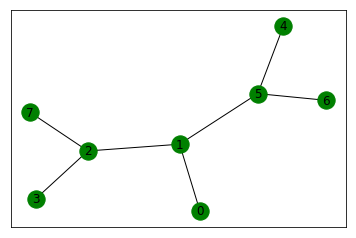

In [ ]:
goal = 7
mapping={0:'Start', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7-Destination'}
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G, k=.5, center=points_list[2])
nx.draw_networkx_nodes(G, pos, node_color= 'g')
nx.draw_networkx_edges(G, pos, node_color= 'b')
nx.draw_networkx_labels(G, pos)

In [ ]:
NO_OF_POINTS = 8

In [ ]:
R = np.matrix(np.ones(shape = (NO_OF_POINTS, NO_OF_POINTS)))
R *=-1

In [ ]:
for point in points_list:
    print(point)
    if point[1] ==goal:
        R[point] = 150
    else:
        R[point] = 0
        
    if point[0] == goal:
        R[point[::-1]] = 150
    else:
        #reverse point
        R[point[::-1]] = 0

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


In [ ]:
R[goal, goal] = 150

In [ ]:
R

matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 150.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 150.]])

In [ ]:
Q = np.matrix(np.zeros([NO_OF_POINTS, NO_OF_POINTS]))

#the learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state, ]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    Q[current_state, action] = R[current_state, action] + gamma *max_value
    print('max_value', R[current_state, action] + gamma *max_value)
    
    if np.max(Q > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
update(initial_state, action, gamma)

max_value 0.0


0

In [ ]:
scores=[]
for i in  range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    print ('Scores :', str(score))
    
print('Trained Q matrix: ')
print (Q/np.max(Q)*100)

#testing
current_state = 0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,]== np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

max_value 150.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 270.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 0.0
Scores : 100.0
max_value 

Most efficient path:
[0, 1, 2, 7]


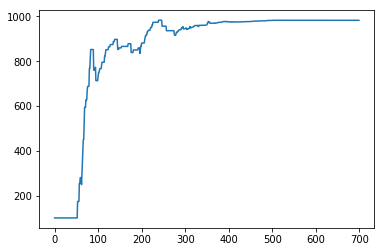

In [ ]:
# Most efficient path and Number of iterations taken to calculate the path and 
print('Most efficient path:')
print(steps)

plt.plot(scores)
plt.show()